In [17]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [18]:
X = torch.tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [19]:
torch.manual_seed(42)
input_size = 2
hidden1 = 4
hidden2 = 4
output_size = 1

In [20]:
W1 = torch.randn(input_size, hidden1, requires_grad=True)
b1 = torch.zeros(hidden1, requires_grad=True)

In [21]:
W2 = torch.randn(hidden1, hidden2, requires_grad=True)
b2 = torch.zeros(hidden2, requires_grad=True)

In [22]:
W3 = torch.randn(hidden2, output_size, requires_grad=True)
b3 = torch.zeros(output_size, requires_grad=True)

In [23]:
lr = 0.1 
epochs = 5000
loss_history = []

In [28]:
for epoch in range(epochs):

    z1 = X @ W1 + b1
    a1 = torch.sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = torch.sigmoid(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)
    loss = F.binary_cross_entropy(y_pred, y)
    loss.backward()
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad

        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        W3 -= lr * W3.grad
        b3 -= lr * b3.grad

        # Zero the gradients
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()
        W3.grad.zero_()
        b3.grad.zero_()

    loss_history.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch} - Loss: {loss.item():.4f}")

Epoch 0 - Loss: 0.0035
Epoch 500 - Loss: 0.0032
Epoch 1000 - Loss: 0.0030
Epoch 1500 - Loss: 0.0028
Epoch 2000 - Loss: 0.0027
Epoch 2500 - Loss: 0.0025
Epoch 3000 - Loss: 0.0024
Epoch 3500 - Loss: 0.0022
Epoch 4000 - Loss: 0.0021
Epoch 4500 - Loss: 0.0020


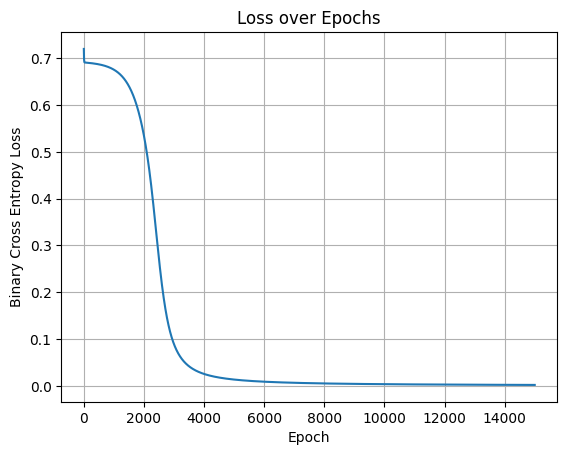

In [30]:
plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.grid(True)
plt.show()

In [12]:
with torch.no_grad():
    z1 = X @ W1 + b1
    a1 = torch.sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = torch.sigmoid(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)
    predicted = (y_pred > 0.5).float()

print("Predictions:\n", predicted)
print("Ground Truth:\n", y)


Predictions:
 tensor([[0.],
        [1.],
        [1.],
        [0.]])
Ground Truth:
 tensor([[0.],
        [1.],
        [1.],
        [0.]])
